In [1]:
import sys
sys.path.append('/Users/i335644/PycharmProjects/my_inv_mgr/')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import utility
import index_peb.lxr_peb_analysis as lxr_peb_analysis
import index_peb.lxr_peb as lxr_peb

%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,15)

### 更新peb数据

In [2]:
index_codes, _ = utility.read_params(file='bt_params')
index_codes = index_codes['index_code'].drop_duplicates()
index_codes = index_codes.replace('000001', '1000004')
index_codes = index_codes.replace('000985', '1000002')

In [3]:
lxr_peb.update_data(index_codes)

incrementally update: 000905...
incrementally update: 000300...
incrementally update: 000922...
incrementally update: 000903...
incrementally update: 399006...
incrementally update: 000933...
incrementally update: 000931...
incrementally update: 000935...
incrementally update: 399995...
incrementally update: 399971...
incrementally update: 399967...
incrementally update: 000807...
incrementally update: 000992...
incrementally update: 399812...
incrementally update: 000827...
incrementally update: 000990...
incrementally update: 399975...
incrementally update: 1000002...
incrementally update: 1000004...
incrementally update: 399001...
incrementally update: 000016...
incrementally update: 000852...
incrementally update: 000906...
incrementally update: 000688...


### peb分析

In [2]:
# 数据准备
index_list, _ = utility.read_params(file='bt_params')
index_list = index_list['index_code'].drop_duplicates().tolist()

#### 至今为止的PE或者PB的折线图比较，参数选择: 市值加权 :mcw/等权 :ew/正数等权 :ewpvo/平均值 :avg/中位数 :median

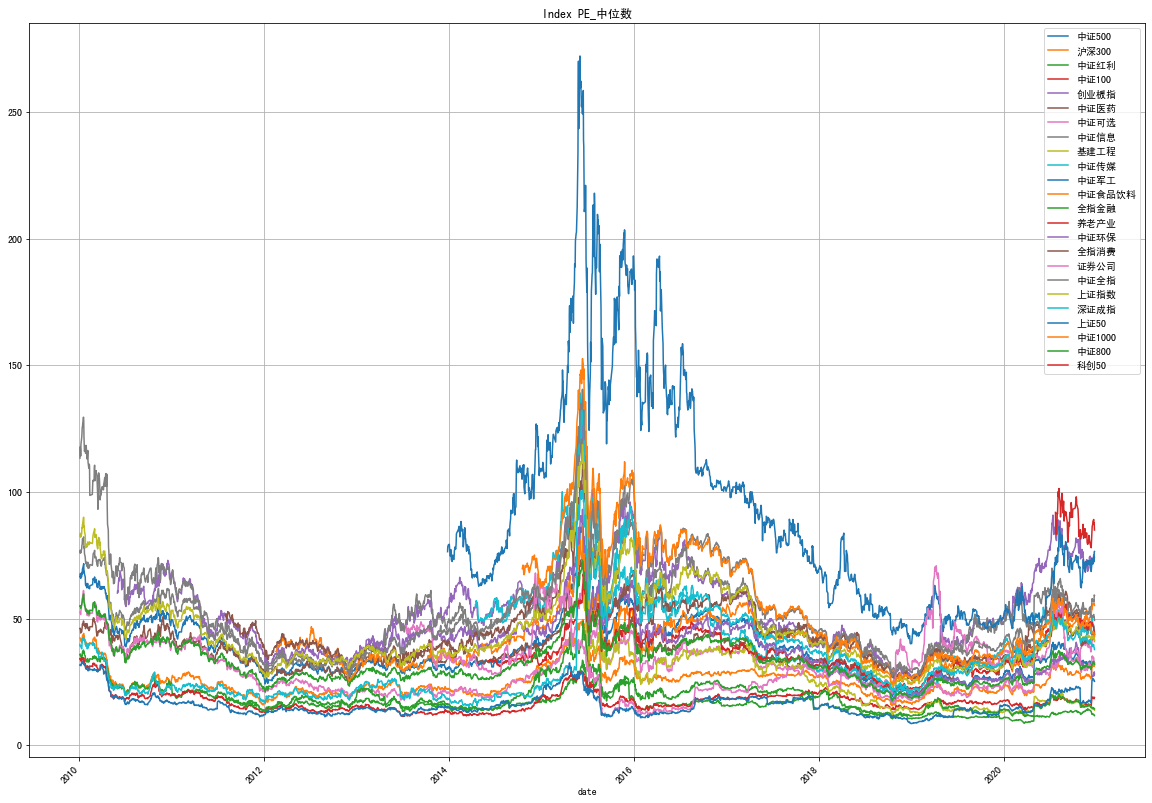

In [6]:
lxr_peb_analysis.plot_indexes_peb_with_given_method(
    index_list=index_list, start_date='20100101', end_date=None, method='median', peb='pe')

In [14]:
df = lxr_peb_analysis.get_indexes_mul_date_by_field(index_list, start_date='20100101', field='pe_ttm_median')
df.head()

,000905,000300,000922,000903,399006,000933,000931,000935,399995,399971,...,000827,000990,399975,000985,000001,399001,000016,000852,000906,000688
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,66.526208,42.400118,35.753862,34.117407,NaN,46.169370,52.665975,113.345516,NaN,NaN,...,NaN,NaN,NaN,76.033322,82.519946,39.873543,31.727615,NaN,55.071229,NaN
2010-01-05,66.615240,42.186166,36.007595,34.098720,NaN,46.251869,52.321409,117.844201,NaN,NaN,...,NaN,NaN,NaN,77.024068,83.552702,39.131869,31.822366,NaN,55.130086,NaN
2010-01-06,67.844297,42.018255,36.048823,34.406476,NaN,45.810960,51.946694,116.925075,NaN,NaN,...,NaN,NaN,NaN,76.680569,83.681947,39.346572,31.866082,NaN,54.751952,NaN
2010-01-07,65.919099,41.586926,35.231715,33.320763,NaN,44.329138,51.651852,114.204535,NaN,NaN,...,NaN,NaN,NaN,75.935434,82.177939,39.190917,31.492403,NaN,54.141239,NaN
2010-01-08,66.634275,41.146725,35.239916,33.542072,NaN,44.614785,53.217662,118.752343,NaN,NaN,...,NaN,NaN,NaN,76.194657,82.370671,38.845376,31.478731,NaN,55.038263,NaN


In [17]:
from pyecharts.charts import Line

In [28]:
df.index.tolist()

[Timestamp('2010-01-04 00:00:00'),
 Timestamp('2010-01-05 00:00:00'),
 Timestamp('2010-01-06 00:00:00'),
 Timestamp('2010-01-07 00:00:00'),
 Timestamp('2010-01-08 00:00:00'),
 Timestamp('2010-01-11 00:00:00'),
 Timestamp('2010-01-12 00:00:00'),
 Timestamp('2010-01-13 00:00:00'),
 Timestamp('2010-01-14 00:00:00'),
 Timestamp('2010-01-15 00:00:00'),
 Timestamp('2010-01-18 00:00:00'),
 Timestamp('2010-01-19 00:00:00'),
 Timestamp('2010-01-20 00:00:00'),
 Timestamp('2010-01-21 00:00:00'),
 Timestamp('2010-01-22 00:00:00'),
 Timestamp('2010-01-25 00:00:00'),
 Timestamp('2010-01-26 00:00:00'),
 Timestamp('2010-01-27 00:00:00'),
 Timestamp('2010-01-28 00:00:00'),
 Timestamp('2010-01-29 00:00:00'),
 Timestamp('2010-02-01 00:00:00'),
 Timestamp('2010-02-02 00:00:00'),
 Timestamp('2010-02-03 00:00:00'),
 Timestamp('2010-02-04 00:00:00'),
 Timestamp('2010-02-05 00:00:00'),
 Timestamp('2010-02-08 00:00:00'),
 Timestamp('2010-02-09 00:00:00'),
 Timestamp('2010-02-10 00:00:00'),
 Timestamp('2010-02-

In [39]:
line = Line().add_xaxis(df.index.tolist()).add_yaxis(
    '000905', df['000905'].tolist()).add_yaxis('000300', df['000300'].tolist())


line.render_notebook()